In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

## Multi-layer Perceptron with S1 Pulse as Input
<br> Label NR as 1 and ER as 0
<br> Since each sample in the input has different length, I will fill 0 to make them the same length.
<br> 75% training data and 25% testing data
<br> Ignore depth dependence

In [2]:
NRpulses = pd.read_pickle('DD_S1pulse_raw.pickle')
ERpulses = pd.read_pickle('CH3T_S1pulse_raw.pickle')
NRS1 = np.array(NRpulses['S1pulse'])
ERS1 = np.array(ERpulses['S1pulse'])
NRlabel = [1]*len(NRS1)
ERlabel = [0]*len(ERS1)

In [3]:
NRlen = [len(x) for x in NRS1]
ERlen = [len(x) for x in ERS1]
maxNRlen = max(NRlen)
maxERlen = max(ERlen)
maxlen = max(maxNRlen,maxERlen)

maskNR = []
maskER = []

NRlenpad = []
ERlenpad = []

for i in range(len(NRlen)):
    temMask = np.array(list([True]*NRlen[i])+list([False]*int(maxlen-NRlen[i])))
    tem = np.array(list(NRS1[i])+list([0]*int(maxlen-NRlen[i])))
    maskNR.append(temMask)
    NRlenpad.append(tem)
    
for i in range(len(ERlen)):
    temMask = np.array(list([True]*ERlen[i])+list([False]*int(maxlen-ERlen[i])))
    tem = np.array(list(ERS1[i])+list([0]*int(maxlen-ERlen[i])))
    maskER.append(temMask)
    ERlenpad.append(tem)

In [4]:
X, y = list(NRlenpad)+list(ERlenpad), list(NRlabel)+list(ERlabel)
print("Total number of samples: "+str(len(X)))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the whole pipeline
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

# we can now use it like any other estimator
print("Accuracy Score: "+str(round(clf.score(X_train, y_train),2)))

Total number of samples: 11335
Accuracy Score: 0.65


In PSD, we are worried about the ER leakage. Therefore, we care more about whether there are ER events been labeled as NR events by the model. Based on the results below, 24% of ER events are labeled as NR by logistic regression model. However, this number highly depends on random state set, so it's untrustworthy. If I can random_state=1, it's 85%. The overall accuracy is similar to LR and SVM.

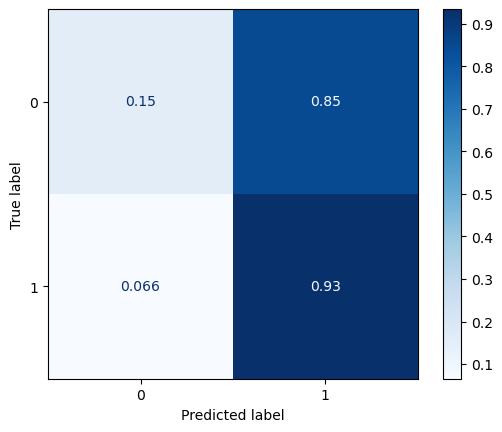

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize='true',
    )

plt.show()

## Multi-layer Perceptron with S1 Photon Timings as Input
<br> Label NR as 1 and ER as 0
<br> Since each sample in the input has different length, I will fill 10000 to make them the same length. I don't fill them with 0 since 0 means something in photon timings.
<br> For each S1, the reference time is the median.
<br> 75% training data and 25% testing data
<br> Ignore depth dependence

In [6]:
NRtimes = pd.read_pickle('DD_TimesForPulses_06152023.pkl')
ERtimes = pd.read_pickle('CH3T_TimesForPulses_06152023.pkl')
NRTiming = np.array(NRtimes['Times'])
ERTiming = np.array(ERtimes['Times'])
NRlabel = [1]*len(NRTiming)
ERlabel = [0]*len(ERTiming)

In [7]:
NRlen = [len(x) for x in NRTiming]
ERlen = [len(x) for x in ERTiming]
maxNRlen = max(NRlen)
maxERlen = max(ERlen)
maxlen = max(maxNRlen,maxERlen)

NRlenpad = []
ERlenpad = []

for i in range(len(NRlen)):
    tem = np.array(list(NRTiming[i])+list([10000]*int(maxlen-NRlen[i])))
    NRlenpad.append(tem)
    
for i in range(len(ERlen)):
    tem = np.array(list(ERTiming[i])+list([10000]*int(maxlen-ERlen[i])))
    ERlenpad.append(tem)

In [8]:
X, y = list(NRlenpad)+list(ERlenpad), list(NRlabel)+list(ERlabel)
print("Total number of samples: "+str(len(X)))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

# we can now use it like any other estimator
print("Accuracy Score: "+str(round(clf.score(X_train, y_train),2)))

Total number of samples: 11335
Accuracy Score: 0.65


In PSD, we are worried about the ER leakage. Therefore, we care more about whether there are ER events been labeled as NR events by the model. Based on the results below, 79% of ER events are labeled as NR by logistic regression model. However, this number highly depends on random state set, so it's untrustworthy. If I can random_state=0, it's 17%. The overall accuracy is similar to LR and SVM.

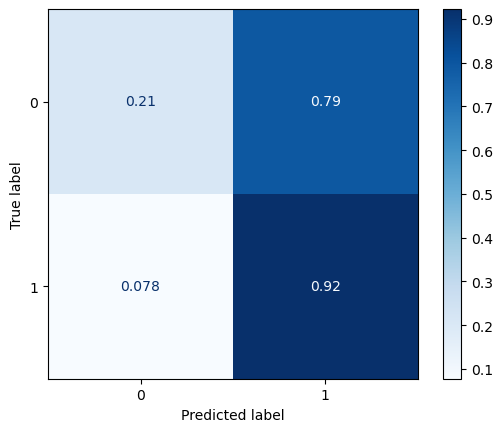

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize='true',
    )

plt.show()